In [0]:
#nltk.download('punkt')
# we update and install spaCy
# !pip install -U spacy

In [0]:
pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=23cd4e62e127ab6f50aa48fc199a024422faad27a52bdb317eaa62787b49cf7d
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


It's much easier to use an existing library that does all this preprocessing for us (but it's limited to wikipedia articles).

In [0]:
import wikipedia

topics = ["Albert Einstein",
          "Ada Lovelace",
          "Abraham Lincoln",
          "Stephen Hawking",
          "Steve Jobs",
          "Bill Gates",
          "Bill Clinton"
]

data = [wikipedia.summary(topics[p], sentences=20) for p in range(len(topics))]

# we will try this later
# data = [wikipedia.page(topics[p]).content for p in range(len(topics))]

In [0]:
# show the first sentences about Ada Lovelace
data[1]

'Augusta Ada King, Countess of Lovelace (née Byron; 10 December 1815 – 27 November 1852) was an English mathematician and writer, chiefly known for her work on Charles Babbage\'s proposed mechanical general-purpose computer, the Analytical Engine. She was the first to recognise that the machine had applications beyond pure calculation, and published the first algorithm intended to be carried out by such a machine. As a result, she is sometimes regarded as the first to recognise the full potential of a "computing machine" and one of the first computer programmers.Lovelace was the only legitimate child of poet Lord Byron and his wife Lady Byron. All of Byron\'s other children were born out of wedlock to other women. Byron separated from his wife a month after Ada was born and left England forever four months later. He commemorated the parting in a poem that begins, "Is thy face like thy mother\'s my fair child! ADA! sole daughter of my house and heart?". He died of disease in the Greek W

## Converting the text into vectors

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import stop_words
import pandas as pd

stopwords = stop_words.ENGLISH_STOP_WORDS

# using default tokenizer 
count = CountVectorizer(ngram_range=(1,2), stop_words = None)
bow = count.fit_transform(data)

## Computing the Cosine Similarity

In [0]:
from sklearn.metrics.pairwise import cosine_similarity

# compute first item against all the rest
cosine_similarity(bow[0:1], bow)

array([[1.        , 0.49048836, 0.524366  , 0.69213911, 0.59472915,
        0.50936923, 0.53733868]])

We see that the maximum cosine similarity is achieved for the 4th item and it is 0.69. The above shows that "Albert Einstein" is more similar to "Steven Hawking".

Now let's see all the pairwise similarities.


In [0]:
pairwise_similarities = cosine_similarity(bow, bow)

pairwise_df = pd.DataFrame(
    pairwise_similarities,
    columns = topics,
    index = topics
)
pairwise_df

,Albert Einstein,Ada Lovelace,Abraham Lincoln,Stephen Hawking,Steve Jobs,Bill Gates,Bill Clinton
Albert Einstein,1.000000,0.490488,0.524366,0.692139,0.594729,0.509369,0.537339
Ada Lovelace,0.490488,1.000000,0.436276,0.511915,0.527538,0.421445,0.503255
Abraham Lincoln,0.524366,0.436276,1.000000,0.510995,0.568423,0.478992,0.480819
Stephen Hawking,0.692139,0.511915,0.510995,1.000000,0.622700,0.469529,0.547745
Steve Jobs,0.594729,0.527538,0.568423,0.622700,1.000000,0.548664,0.554570
Bill Gates,0.509369,0.421445,0.478992,0.469529,0.548664,1.000000,0.473785
Bill Clinton,0.537339,0.503255,0.480819,0.547745,0.554570,0.473785,1.000000


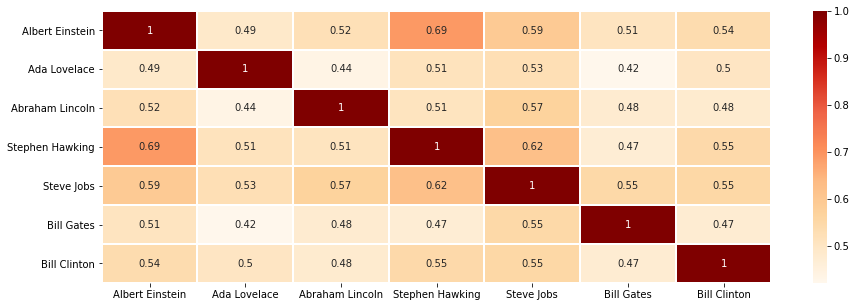

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# show it 
plt.figure(figsize=(15,5))
sns.heatmap(
    pairwise_df,
    cmap='OrRd',
    linewidth=1,
    annot=True
)

# Exercise 1

In the first block, uncomment this code:

> `# data = [wikipedia.page(topics[p]).content for p in range(len(topics))]`

to get the full text from each wikipedia entry, not just a summary.

**Questions**:
1. What do you notice in the pairwise similarities?
2. Why is this happening?

# Exercise 2

We will remedy what you noticed before. 

1. How can we do it?
2. How does the new pairwise matrix look like now?